# Statistical Methods (SS18) {-}
## David Bubeck, Henrik Lukas Ruh & Manuel Bayer {-}
## Exercise 8 for August 16, 2018, 9:00 {-}

### 8.1 Return to the lighthouse {-}
We extend the lighthouse problem now by considering the position along the beach $x_0$ as unknown, becoming a to-be-estimated parameter. To estimate the ($x_0$, $y_0$) vector you should set-up its joint posterior PDF. From that derive the MAP, the mean, the standard deviation of $x_0$, and $y_0$, and their correlation. To this end, construct a reasonably fine grid in $x$ and $y$ and calculate the posterior on that 2D grid. You should try two priors: (i) a flat prior $p(x, y)\propto1$; (ii) a prior $p(x,y)\propto\frac{1}{y(1+x^2)}$ This means, assume a Cauchy distribution for $x$ centered at the origin, and an uninformative prior for $y$. 

##### a: Plot the normalized posterior for both priors.
To compute mean, standard deviation respectively variance & correlation coefficients we used an analogous approach as for the previous homework assignment, i.e., we discretised the occuring integrals into sums leading to $$\int xp(x,y)\mathrm dx\simeq\sum_i x_ip(x_i,y_i)\Delta x$$ where $\Delta x$ is the step size & analogously for the other integrals.

In [2]:
library(rmutil) # Package for two dimensional integration

# read in data
data <- read.table("lighthouse.dat", header=FALSE)

# display some of the data
head(data)

xk <- data$V1


Attaching package: ‘rmutil’

The following object is masked from ‘package:stats’:

    nobs

The following objects are masked from ‘package:base’:

    as.data.frame, units



V1
-57.20
-18.53
-10.66
-4.79
-4.16
-2.59


In [3]:
samp <- 1000 # Sampling of 2D grid
x0range <- seq(.5,2, length=samp)
y0range <- seq(.5,1.5, length=samp) # Previously from 0.01 to 5

L <- function(x0, y0) prod(1/(2 * pi) * y0 / (x0 ** 2 - 2*x0 * xk + y0 ** 2
                                              + xk ** 2)) # Likelihood
uninfo_prior <- 1 # Not normalised uninformative prior
cauchy_prior <- function(x, y) 1/(y * (1 + x ** 2)) # Not normalised Cauchy 
                                                    # prior

uninfo_posterior <- function(x0, y0)  L(x0, y0)*uninfo_prior # Not normalised
# posterior for the uninformative prior
cauchy_posterior <- function(x0, y0) L(x0, y0)*cauchy_prior(x0, y0) # Not
# normalised posterior wrt Cauchy prior

uninfo_posterior_v <- function(v)  L(v[1], v[2])*uninfo_prior # Not normalised
# posterior for the uninformative prior
cauchy_posterior_v <- function(v) L(v[1], v[2])*cauchy_prior(v[1], v[2]) # Not
# normalised posterior wrt Cauchy prior

# Initialisation of the matrix containing the not normalised posterior values
# for the uninformative prior
uninfo_posterior_val <- matrix(ncol=samp, nrow=samp)
# Initialisation of the matrix containing the not normalised posterior values
# for the Cauchy prior
cauchy_posterior_val <- matrix(ncol=samp, nrow=samp)
# Matrix with all possible coordinates
coords <- expand.grid(x0range, y0range)
uninfo_posterior_val <- matrix(apply(coords,1,uninfo_posterior_v),ncol=samp,
                               nrow=samp)
cauchy_posterior_val <- matrix(apply(coords,1,cauchy_posterior_v),ncol=samp,
                               nrow=samp)

# Normalisation
uninfo_integral <-  int2(uninfo_posterior, a=c(-Inf,0), b=c(Inf,Inf))
cauchy_integral <-  int2(cauchy_posterior,  a=c(0,0), b=c(Inf,Inf))

uninfo_norm_posterior <- uninfo_posterior_val/uninfo_integral
cauchy_norm_posterior <- cauchy_posterior_val/cauchy_integral

In [4]:
##### Statistics ##### (see explanations above for used methods to compute mean,
# standard deviation & correlation coefficient)
# Step size for numerical integration
dx <- (max(x0range)-min(x0range))/length(x0range)
dy <- (max(y0range)-min(y0range))/length(y0range)

# Uninformative prior
uninfo_map <- c(x0range[which.max(uninfo_norm_posterior) %/% samp], 
                y0range[which.max(uninfo_norm_posterior)%/% samp]) # MAP
uninfo_mean <- c(sum(colSums(uninfo_norm_posterior)*x0range)*dx*dy, 
                 sum(rowSums(uninfo_norm_posterior)*y0range)*dx*dy) # Mean  
uninfo_sig <- c((sum(colSums(uninfo_norm_posterior * x0range ** 2))*dx*dy 
                 - uninfo_mean[1] ** 2)**.5, 
                (sum(rowSums(uninfo_norm_posterior * y0range ** 2))*dx*dy
                 - uninfo_mean[2] ** 2)**.5) # Standard deviation
uninfo_cor <- (sum(colSums(uninfo_norm_posterior*x0range*y0range))*dx*dy-
               uninfo_mean[1]*uninfo_mean[2])/
                (uninfo_sig[1]*uninfo_sig[2]) # Correlation coefficient

cat("\nUninformative prior (x0,y0)\n---------------------\n")
cat("MAP = ", uninfo_map," miles\n")
cat("mean = ", uninfo_mean," miles\n")
cat("sigma = ", uninfo_sig," miles\n")
cat("correlation coefficient = ", uninfo_cor,"\n")

# Cauchy prior
cauchy_map <- c(x0range[which.max(cauchy_norm_posterior) %/% samp],
                y0range[which.max(cauchy_norm_posterior) %/% samp]) # MAP
cauchy_mean <- c(sum(colSums(cauchy_norm_posterior)*x0range)*dx*dy, 
                 sum(rowSums(cauchy_norm_posterior)*y0range)*dx*dy) # Mean 
cauchy_sig <- c((sum(colSums(cauchy_norm_posterior * x0range ** 2)) *dx*dy -
                 cauchy_mean[1] ** 2)**.5,
                (sum(rowSums(cauchy_norm_posterior * y0range ** 2)) *dx*dy - 
                 cauchy_mean[2] ** 2)**.5) # Standard deviation
cauchy_cor <- (sum(colSums(cauchy_norm_posterior*x0range*y0range))*dx*dy-
               cauchy_mean[1]*cauchy_mean[2])/
                (cauchy_sig[1]*cauchy_sig[2]) # Correlation coefficient

cat("\nCauchy prior (x0,y0)\n---------------------\n")
cat("MAP = ", cauchy_map," miles\n")
cat("mean = ", cauchy_mean," miles\n")
cat("sigma = ", cauchy_sig," miles\n")
cat("correlation coefficient = ", cauchy_cor,"\n")


Uninformative prior (x0,y0)
---------------------
MAP =  1.13964 0.9264264  miles
mean =  0.6083911 0.4945274  miles
sigma =  0.646648 0.5068703  miles
correlation coefficient =  0.9998407 

Cauchy prior (x0,y0)
---------------------
MAP =  1.099099 0.8993994  miles
mean =  1.180754 0.9765185  miles
sigma =  0.3582724 0.1451527  miles
correlation coefficient =  1.246604 


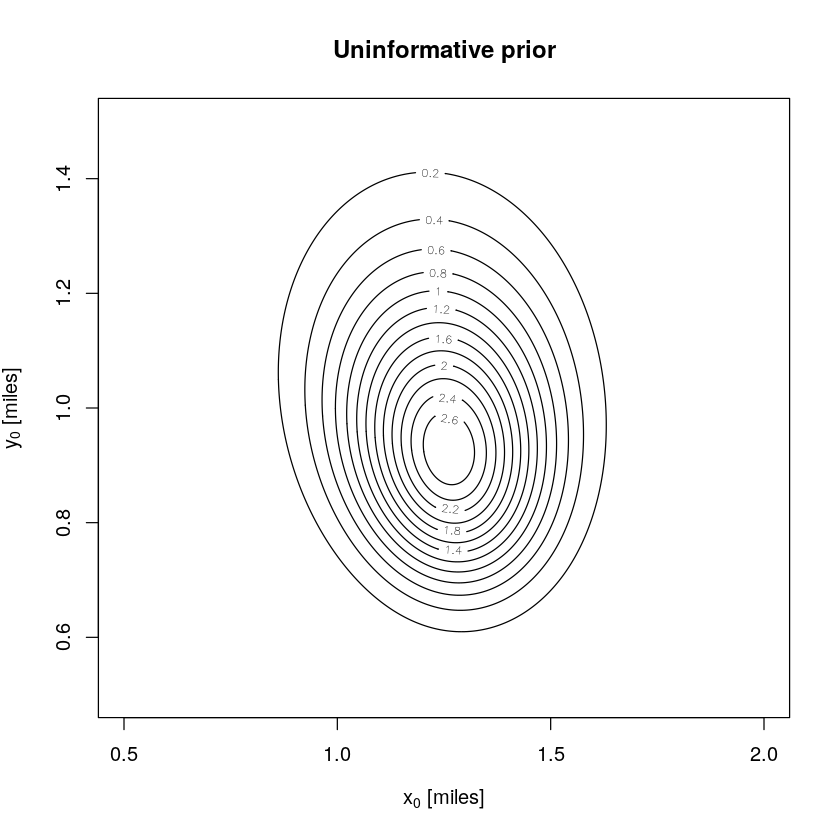

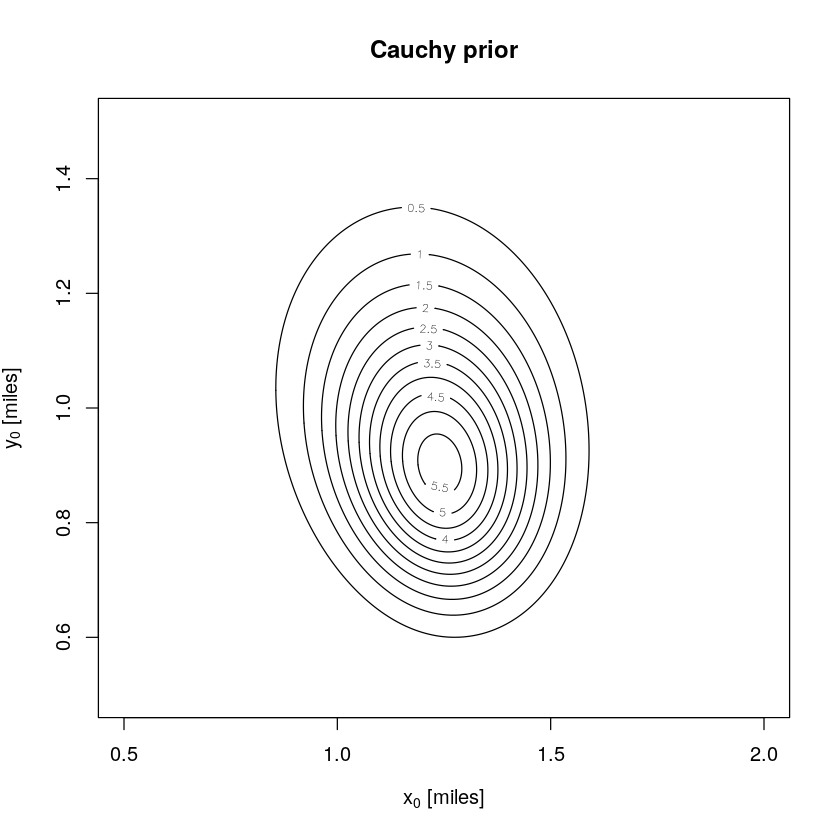

In [5]:
##### a #####

# Plotting
contour(x0range, y0range, uninfo_norm_posterior,
        xlab=expression('x'[0]*' [miles]'),
        ylab=expression('y'[0]*' [miles]'),
        main="Uninformative prior") 
contour(x0range, y0range, cauchy_norm_posterior,
        xlab=expression('x'[0]*' [miles]'),
        ylab=expression('y'[0]*' [miles]'),
        main="Cauchy prior") 

##### b: Can you explain the differences or similarities between the two cases?
We can see that the MAP is quite similar for both cases, while the mean, standard deviation & correlation coefficients differ significantly. However, it is difficult to compare both cases & draw conclusions from our results because we had problems normalising posteriors for both priors as especially the Cauchy prior is singular at $y=0$ and the used function *int2* seemed to have difficulties handling this singularity and small values for $x_0$ & $y_0$ that is why we only integrate both posteriors from $y_0\in(0,\infty)$ and the posterior resulting from the Cauchy prior for $x_0\in(0,\infty)$, although we do not know at the outset if $x_0$ is only positive or can also be negative. Anyway, we can expect due to the chosen coordinate system that $y_0$ is strictly positive. The fact that the normalisation of the posteriors did not work accordingly becomes clear when considering several points. Firstly, the contour values in the plots above reach values higher than one. Secondly, the computed correlation coefficients wrt the Cauchy prior is bigger than one in contradiction to the expectation that the correlation coefficients can only take values between -1 & 1. Therefore, the two posteriors are not properly normalised.

##### c: Do you have an idea how to determine the joint confidence region for ($x_0$, $y_0$)?
We can consider the $\chi^2$ values computed from $$\Delta\chi^2=\Delta\theta^\mathrm{T}\mathrm{Cov}\left[(\hat{x_0},\hat{y_0})^\mathrm T,(\hat{x_0},\hat{y_0})\right]^{-1}\Delta\theta$$ where $$\Delta\theta=(x_0-\hat{x_0},y_0-\hat{y_0})^\mathrm T$$ are the sampled the deviations from our computed estimator $\hat{x_0}$ & $\hat{y_0}$ for the parameters. With the $\chi^2$ values we can get to the right confidence levels for the apt probability in the case of two d.o.f. (two parameters).

### 8.2 Interpretation of the p-value {-}
In a special issue of the "Spektrum der Wissenschaft" Magazine entitled Vorsicht Statistik! your lecturer came across an article on the interpretation (or often mis-interpretation) of the p-value in hypothesis testing. The article contained the following information box:

---

The question now is: do the numbers given in the figure of the box make sense? Can you confirm the numbers?

##### a: Apparently, the box is about hypothesis testing. While it is not clearly stated, the given p- values can be interpreted as significance level of the test (the experiment) that is conducted to decide whether a substance is effective or not. Assuming this, what is exactly meant by "Wahrscheinlichkeit nach dem Experiment" (probability after the experiment)?


#### A:
The 'Wahrscheinlichkeit nach dem Eperiment'  $p_{nE}$, hereafter denoted with WnE, describes the probability that a hypothesis is true given that the substance was tested to be effective ($+$). The two possible hypothesis are (i) the nul hypothesis $\mathrm{H}_0$, meaning the substance is in fact not effective, and (ii) the hypothesis that the substance is effective $\mathrm{\bar H}_0$. Hence,
$$
p_{nE}(\mathrm{H}_0) = p(\mathrm{H}_0|+),
$$
$$
p_{nE}(\mathrm{\bar H}_0) = p(\mathrm{\bar H}_0|+).
$$

##### b: No statement is made about the power of the test. However, this is an important piece of information. Can you "reverse engineer" the power of the test(s)? Is it always the same? 


#### A:
The power of the test $\beta$ denotes the probability that the test is positive, the substance is measured to be effective, under the condition that the hypothesis $\mathrm{\bar H}_0$ is fulfilled, the substance is indeed effective, and is given by
$$
\beta = p(+|\mathrm{\bar H}_0).
$$

The given piece of information is the significance level $\alpha$, where
$$
\alpha = p(+|\mathrm{\bar H}_0).
$$

Now, we can compute $\beta$, where we use the Bayes theorem.
$$
\frac{\alpha}{\beta} = \frac{p(+|\mathrm{H}_0)}{p(+|\mathrm{\bar H}_0)}
= \frac{p(\mathrm{H}_0|+)p(\mathrm{\bar H}_0)p(+)}{p(\mathrm{\bar H}_0|+)p(\mathrm{ H}_0)p(+)}
= \frac{p(\mathrm{H}_0|+)p(\mathrm{\bar  H}_0)}{p(\mathrm{\bar H}_0|+)p(\mathrm{H}_0)}.
$$

Herein, $p(\mathrm{H}_0)$ and $p(\mathrm{\bar H}_0)$ are the 'a priori' probabilties of the hypothesis. Thus,
$$
\beta = \alpha \ \frac{p_{nE}(\mathrm{\bar H}_0)p(\mathrm{ H}_0)}{p_{nE}(\mathrm{ H}_0)p(\mathrm{\bar  H}_0)}.
$$

The $\beta$ values for the data in the box are given in the table below.

|         | $\alpha = 0.05$       | $\alpha = 0.01$        |
|---------------------|---------------------|---------------------|
| case 1 | $\beta = 0.12$    | $\beta = 0.08$    |   
| case 2 | $\beta = 0.12$    | $\beta = 0.08$    | 
| case 3 | $\beta = 0.13$    | $\beta = 0.11$    | 

case 1: 'abwegige Idee',
case 2: 'Münzwurf',
case 3: 'fast sichere Sache'

##### c: What is your opinion about the given example?

#### A:
The power of the test is quite low, meaning that if we had a larger $\beta$ the WnE for the substance to be effective would be larger as well. However, the example shows that one has to be careful what kind of probability is stated. in especially, the p-value is not the complement of the probability that a hypothesis is true.